# Sentiment Analysis Using Logistic Regression Model

This is the labeled training set of IMDB movie reviews, specially selected for sentiment analysis. The file is tab-delimited and has a header row followed by 25,000 rows containing an id, sentiment, and text for each review.
<BR>
The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews. 

DataSource: https://www.kaggle.com/c/word2vec-nlp-tutorial/data

In [2]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

## 1. Load the data as a Pandas data frame and ensure that it imported correctly.

In [4]:
# Import necessary libraries
import pandas as pd
import zipfile

# Read the TSV file
df = pd.read_csv("labeledTrainData.tsv", sep="\t")

# Display the first few rows
display(df.head())

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


## 2 Get the stemmed data


In [6]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc
)

# Download NLTK stopwords
# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = re.sub(r'<.*?>', ' ', text)  # remove HTML
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # keep only letters
    text = text.lower()
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_review'] = df['review'].apply(preprocess)
df['cleaned_review'] 

0        stuff go moment mj start listen music watch od...
1        classic war world timothi hine entertain film ...
2        film start manag nichola bell give welcom inve...
3        must assum prais film greatest film opera ever...
4        superbl trashi wondrous unpretenti exploit hoo...
                               ...                        
24995    seem like consider gone imdb review film went ...
24996    believ made film complet unnecessari first fil...
24997    guy loser get girl need build pick stronger su...
24998    minut documentari bu uel made earli one spain ...
24999    saw movi child broke heart stori unfinish end ...
Name: cleaned_review, Length: 25000, dtype: object

## 3. Split Data into Training and Test Sets

In [8]:
# This split is essential for fair evaluation — the model sees only training data during learning.

#X_train and y_train are used to train the model.
#X_test and y_test are used to evaluate the model.

X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_review'],  # Feature: preprocessed review text
    df['sentiment'],       # Target: sentiment label (0 or 1)
    test_size=0.2,         # 20% for testing, 80% for training
    random_state=42        # Ensures reproducible splits
)

## 3. Fit and apply the tf-idf vectorization to the training set.

TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used in text mining and natural language processing to evaluate the importance of a word within a document relative to a corpus of documents (or dataset). It helps transform text into numerical features for machine learning models, such as classification or clustering.

Why TF-IDF is Useful:
Highlights important words: Words that appear frequently in one document but not many others will have a high TF-IDF score.

Reduces the weight of common words: Words like "the," "and," etc., will have a lower score because they appear in many documents.

TF focuses on the frequency of words in a specific document.

IDF reduces the weight of common words that appear in many documents.

TF-IDF combines both to find the most significant words in a corpus.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)


## 4. Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).

In [12]:
# Apply (not fit) the same transformation to the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Why fit only on the training set?

Only fit the vectorizer on the training data because the model (in this case, the vectorizer) needs to learn from the training data's 
vocabulary. 

If you fit it on the test data, it would "leak" information from the test set into the training process, which can lead to overfitting and an unrealistic estimation of model performance.

## 5. Train Logistic Regression Model

Logistic Regression is a type of statistical model used for binary classification (i.e., when the outcome variable has two possible classes, such as 0 or 1, True or False, etc.). Despite its name, logistic regression is used for classification tasks rather than regression tasks.


In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg = LogisticRegression()

# Train the model on the TF-IDF transformed training data

# Training the model: The fit() method trains the logistic regression model using the TF-IDF transformed training data (X_train_tfidf) 
# and the corresponding sentiment labels (y_train).

# The model learns the relationship between the words in the reviews and their sentiment (0 or 1).

# X_train_tfidf represents the training features.

# y_train represents the labels (target variable).

logreg.fit(X_train_tfidf, y_train)


LogisticRegression()

## 6. Find the model accuracy on test set.


In [17]:
# This imports the accuracy_score function from sklearn.metrics.
# This function is used to evaluate the accuracy of the model by comparing the predicted values (y_pred) with the true values (y_test).
from sklearn.metrics import accuracy_score

# Make predictions on the test set
# Here, the trained logistic regression model (logreg) makes predictions on the test set (X_test_tfidf).

# The predict() function returns the predicted labels (0 or 1) for the test set.
y_pred = logreg.predict(X_test_tfidf)

# The accuracy_score() function compares the true labels (y_test) with the predicted labels (y_pred) and calculates the accuracy.

# Accuracy is defined as the ratio of correct predictions to the total number of predictions:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)


Accuracy:  0.8876


This means that 88.76% of the predictions made by the logistic regression model on the test set were correct.

## 7. Create a confusion matrix for the test set predictions.


The confusion_matrix() function compares the true labels (y_test) with the predicted labels (y_pred) and generates a confusion matrix.

The confusion matrix is a table that shows the counts of actual versus predicted labels, organized as:

[[True Negative, False Positive],
[False Negative, True Positive]]

Where:

True Negative (TN): Correctly predicted negative class.

False Positive (FP): Incorrectly predicted positive class.

False Negative (FN): Incorrectly predicted negative class.

True Positive (TP): Correctly predicted positive class.

In [20]:
# This imports the confusion_matrix function from sklearn.metrics. 
# This function computes the confusion matrix, which helps to evaluate the performance of the classification model.
from sklearn.metrics import confusion_matrix
    
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)


Confusion Matrix: 
 [[2160  321]
 [ 241 2278]]


This output means:

True Negatives (TN) = 2160   - 2160 instances were correctly predicted as negative (class 0).

False Positives (FP) = 321   - 321 instances were incorrectly predicted as positive (class 1) when they were actually negative.

False Negatives (FN) = 241   - 241 instances were incorrectly predicted as negative when they were actually positive.

True Positives (TP) = 2278   - 2278 instances were correctly predicted as positive (class 1).

## 8. Get the precision, recall, and F1-score for the test set predictions.

Precision: A high precision indicates that when the model predicts the positive class, it is usually correct.

Precision = TP / (TP + FP)

Recall: A high recall indicates that the model is good at identifying positive instances.

Recall = TP / (TP + FN)

F1-Score: The F1-score balances precision and recall. It is useful when to balance both the importance of precision and recall.

F1 = 2 * (Precision * Recall) / (Precision + Recall)



In [23]:
from sklearn.metrics import precision_recall_fscore_support

# Get precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Precision: 0.8764909580607926
Recall: 0.9043271139341008
F1-score: 0.8901914810472841


Precision, recall, and F1-score values indicate that it performs quite well.

Precision: 0.876: When the model predicts a positive class (sentiment = 1), it is correct about 87.6% of the time. This means the model doesn't produce many false positives.

Recall: 0.904: The model correctly identifies 90.4% of all true positive instances (sentiment = 1). This suggests the model is good at detecting positive sentiment.

F1-Score: 0.890: The F1-score is the harmonic mean of precision and recall, and a value of 0.890 shows a good balance between the two metrics.

## 9. Create a ROC curve for the test set.

The ROC curve (Receiver Operating Characteristic curve) is a graphical representation that illustrates the diagnostic ability of a binary classification model as its discrimination threshold is varied. It helps to evaluate how well the model distinguishes between positive and negative classes.

Key Concepts in ROC Curve:
True Positive Rate (TPR) / Sensitivity / Recall:

    This is the proportion of actual positives (class = 1) that are correctly identified by the model.
     
    This is plotted on the y-axis of the ROC curve.

False Positive Rate (FPR):

    This is the proportion of actual negatives (class = 0) that are incorrectly identified as positive by the model.
    
    This is plotted on the x-axis of the ROC curve.

What the ROC curve shows:
(0, 0): Represents a classifier that is always predicting negative (no positive predictions).

(1, 1): Represents a classifier that is always predicting positive (no negative predictions).

The closer the curve is to the top-left corner of the plot, the better the model is at distinguishing between the two classes.

A diagonal line from (0, 0) to (1, 1) represents a random classifier (no useful discrimination), so the further the curve is above this line, the better.

AUC (Area Under the Curve):
The area under the ROC curve (AUC) is a single value that summarizes the overall performance of the classifier.

AUC ranges from 0 to 1:

AUC = 0.5: The model performs no better than random guessing.

AUC = 1: The model perfectly distinguishes between the classes.

AUC > 0.5 and < 1: The model performs better than random guessing, but not perfectly.

Why Use ROC Curve?
ROC curve is especially useful when the classes are imbalanced because it shows how well the model distinguishes between classes at different thresholds.

It allows to assess the model's performance over a range of classification thresholds, rather than relying on a single threshold (like 0.5).

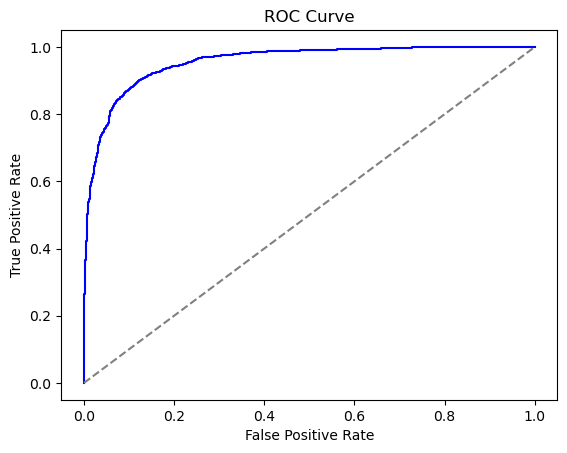

In [26]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_tfidf)[:,1])

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='Logistic Regression')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


## 10. Pick another classification model you learned about this week and repeat steps (5) – (9).

The RandomForestClassifier is an ensemble learning method used for classification tasks. It combines multiple individual decision trees to make predictions. The idea behind Random Forests is to build a collection (forest) of decision trees, where each tree is trained on a random subset of the data, and each tree in the forest makes an individual prediction. The final prediction is made by aggregating the predictions from all the trees in the forest, typically through majority voting.


How Random Forest Works:
Training:

Random subsets of the dataset (with replacement) are used to train each decision tree.

When splitting nodes, Random Forest selects a random subset of features (instead of all features) to find the best split. This adds diversity to the trees.

Prediction:

For classification: Each tree votes for a class, and the class with the majority of votes is chosen as the final prediction.

For regression: The average of the predictions of all trees is taken as the final result.

Advantages:
Accuracy: Random Forests generally provide high accuracy due to the averaging of multiple trees' predictions.

Robustness: It is less prone to overfitting compared to a single decision tree, especially on large datasets with many features.

Handling Missing Data: Random Forest can handle missing data well.

Feature Importance: It can be used to assess the importance of different features for prediction.

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [29]:
# Make predictions
y_pred_rf = rf.predict(X_test_tfidf)

In [30]:
# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy: ", accuracy_rf)

Random Forest Accuracy:  0.8542


Model correctly predicted the sentiment (positive or negative) for about 85.36% of the test samples.

In [32]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix: \n", cm_rf)

Random Forest Confusion Matrix: 
 [[2116  365]
 [ 364 2155]]


True Negatives (TN): 2135

These are the instances that are correctly predicted as the negative class (sentiment = 0).

False Positives (FP): 346

These are the instances that are incorrectly predicted as positive (sentiment = 1) when they are actually negative.

False Negatives (FN): 386

These are the instances that are incorrectly predicted as negative (sentiment = 0) when they are actually positive.

True Positives (TP): 2133

These are the instances that are correctly predicted as positive (sentiment = 1).

The model is performing fairly well, but it might be slightly biased towards the positive class (due to the higher true positives and false negatives). 

In [34]:
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='binary')
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1-score: {f1_rf}")


Random Forest Precision: 0.8551587301587301
Random Forest Recall: 0.8554982135768162
Random Forest F1-score: 0.855328438182179


Precision (0.86): The model correctly identified 86% of the positive class predictions out of all the instances it labeled as positive.

Recall (0.85): Out of all the actual positive instances, the model was able to correctly identify 85% of them.

F1-Score (0.85): This is the harmonic mean of precision and recall, providing a balance between the two. A score of 0.85 indicates that the model is performing well in terms of both precision and recall.

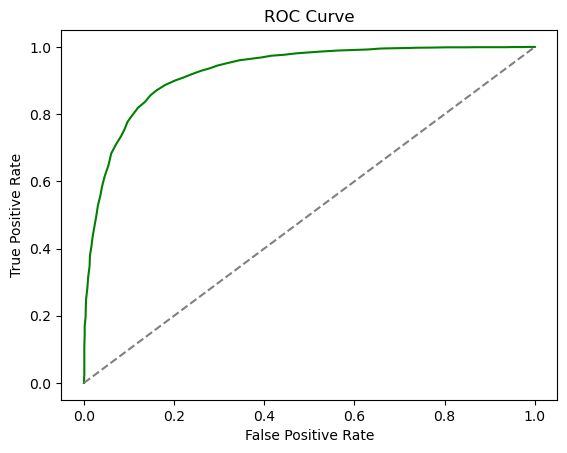

In [36]:
# ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test_tfidf)[:,1])
plt.plot(fpr_rf, tpr_rf, color='green', label='Random Forest')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Summary:

Logistic Regression is performing better overall in terms of accuracy, precision, recall, and F1-score.

Random Forest may have a slight edge in handling the minority class (i.e., not predicting false positives as often), but it has a lower recall and F1-score compared to Logistic Regression.